### Student Information
Name: 丁寧

Student ID: 108134505

GitHub ID: niningding

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

# First part
The take home exercises is in another file called **DM-Lab1-Master**, thanks!

# Second part

## 1. Data Preparation

In [249]:
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import nltk

In [250]:
# read the dataset and store them
files = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']

sentence = []
score = []

for item in files:
    f = open('sentiment labelled sentences/' + item, 'r', encoding='utf-8')
    lines = f.readlines()
    for i in lines:
        sentence.append(i.split('\t')[0])
        score.append(int(i.split('\t')[1]))
    f.close()

In [251]:
len(sentence)

3000

In [252]:
len(score)

3000

## 2. Data Transformation

In [253]:
# converting into Pandas dataframe
X = pd.DataFrame(data=sentence, columns=['Sentence'])

In [254]:
# adding columns
X['Score'] = score

In [255]:
X[0:10]

,Sentence,Score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


## 3. Data Mining using Pandas

### missing values

In [256]:
X.isnull()

,Sentence,Score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2995,False,False
2996,False,False
2997,False,False
2998,False,False


In [257]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
dtype: object

In [258]:
# duplicate data
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [259]:
sum(X.duplicated('Sentence'))

17

In [260]:
len(X)

3000

In [261]:
# keep the first duplicate data
# inplace applies changes directly on our dataframe
X.drop_duplicates(keep='first', inplace=True) 

In [262]:
# 3000-17=2983
len(X)

2983

## 4. Data Preprocessing

### sampling

In [263]:
X_sample = X.sample(n=1000)

In [264]:
len(X_sample)

1000

In [265]:
X_sample[0:10]

,Sentence,Score
436,I wish I could return the unit and get back my...,0
370,"I'll be drivng along, and my headset starts ri...",0
765,in addition it feels &amp; looks as if the pho...,0
187,Great phone!.,1
1442,I let my girlfriend talk me into seeing this -...,0
617,However I needed some better instructions.,0
1731,It handles some tough issues with dignity and ...,1
2339,There is nothing authentic about this place.,0
362,"It is light, easy to use, and has very clear r...",1
1430,I hate writing bad reviews about films - espec...,0


### plot

In [266]:
%matplotlib inline

In [267]:
print(X.Sentence.value_counts())

SWEETEST PHONE!!!                                                                                       1
I don't think you will be disappointed.                                                                 1
I ordered Albondigas soup - which was just warm - and tasted like tomato soup with frozen meatballs.    1
GO AND SEE IT!                                                                                          1
I LOVED it!                                                                                             1
                                                                                                       ..
I usually don't like headbands but this one is very lightweight & doesn't mess up my hair.              1
The movie was very interesting from beginning to the end.                                               1
Worst martini ever!                                                                                     1
Nargile - I think you are great.              

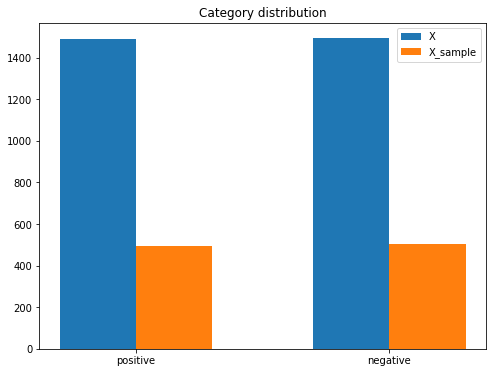

In [268]:
fig, axes = plt.subplots(figsize=(8,6))
x = np.arange(2) 
width = 0.3

p1 = axes.bar(x - width/2, [len(X.loc[X['Score'] == 1]), len(X.loc[X['Score'] == 0])], width, label='X')
p2 = axes.bar(x + width/2, [len(X_sample.loc[X['Score'] == 1]), len(X_sample.loc[X['Score'] == 0])], width, label='X_sample')

axes.set_title('Category distribution')
axes.set_xticks(x)
axes.set_xticklabels(['positive','negative'])
axes.legend()

plt.show()

### feature creation

In [269]:
X['unigrams'] = X['Sentence'].apply(lambda x: dmh.tokenize_text(x))

In [270]:
X[0:5]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
4                             [The, mic, is, great, .]
Name: unigrams, dtype: object

In [271]:
X[0:5]

,Sentence,Score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"


In [272]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### feature subset selection and draw heatmap

In [273]:
from sklearn.feature_extraction.text import CountVectorizer

#  transorfmed the sentences into a term-document matrix
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.Sentence)

In [274]:
# analyze the first record of X dataframe with the analyzer 
analyze = count_vect.build_analyzer()
analyze(" ".join(list(X[:1].Sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [275]:
X_counts.shape

(2983, 5155)

In [276]:
count_vect.get_feature_names()

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2000',
 '2005',
 '2006',
 '2007',
 '20th',
 '2160',
 '23',
 '24',
 '25',
 '2mp',
 '30',
 '30s',
 '325',
 '35',
 '350',
 '375',
 '3o',
 '40',
 '40min',
 '42',
 '44',
 '45',
 '4s',
 '4ths',
 '50',
 '5020',
 '510',
 '5320',
 '54',
 '5lb',
 '680',
 '70',
 '70000',
 '700w',
 '70s',
 '80',
 '80s',
 '8125',
 '85',
 '8525',
 '8530',
 '8pm',
 '90',
 '95',
 '99',
 'aailiyah',
 'abandoned',
 'abhor',
 'ability',
 'able',
 'abound',
 'about',
 'above',
 'abroad',
 'absolute',
 'absolutel',
 'absolutely',
 'absolutley',
 'abstruse',
 'abysmal',
 'ac',
 'academy',
 'accents',
 'accept',
 'acceptable',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessory',
 'accessoryone',
 'accident',
 'accidentally',
 'acclaimed',
 'accolades',
 'accommodations',
 'accomodate',
 'accompanied',
 'according',

In [277]:
X[0:5]

,Sentence,Score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"


In [278]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [279]:
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names()[0:100]]

In [280]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980',
 'term_1986',
 'term_1995',
 'term_1998',
 'term_20',
 'term_2000',
 'term_2005',
 'term_2006',
 'term_2007',
 'term_20th',
 'term_2160',
 'term_23',
 'term_24',
 'term_25',
 'term_2mp',
 'term_30',
 'term_30s',
 'term_325',
 'term_35',
 'term_350',
 'term_375',
 'term_3o',
 'term_40',
 'term_40min',
 'term_42',
 'term_44',
 'term_45',
 'term_4s',
 'term_4ths',
 'term_50',
 'term_5020',
 'term_510',
 'term_5320',
 'term_54',
 'term_5lb',
 'term_680',
 'term_70',
 'term_70000',
 'term_700w',
 'term_70s',
 'term_80',
 'term_80s',
 'term_8125',
 'term_85',
 'term_8525',
 'term_8530',
 'term_8pm',
 'term_90',
 'term_95',
 'term_99',
 'term_aailiyah',
 'term_abandoned',
 'term_abhor',
 'term_ability',
 'term_able',
 'term_abound',
 '

In [281]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [282]:
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [283]:
plot_z = X_counts[0:20, 0:100].toarray()

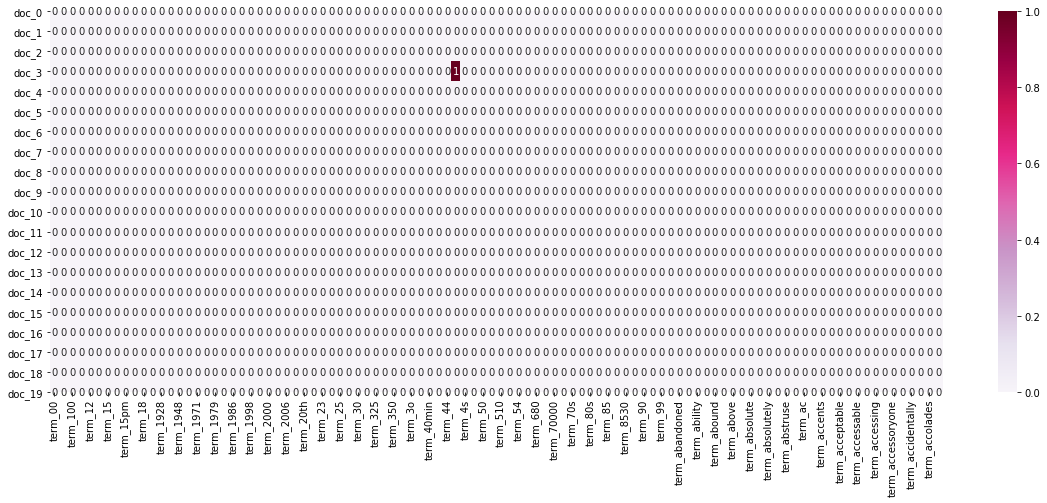

In [284]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### dimensionality reduction

In [285]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [286]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

In [287]:
X_reduced.shape

(2983, 3)

<function matplotlib.pyplot.show(*args, **kw)>

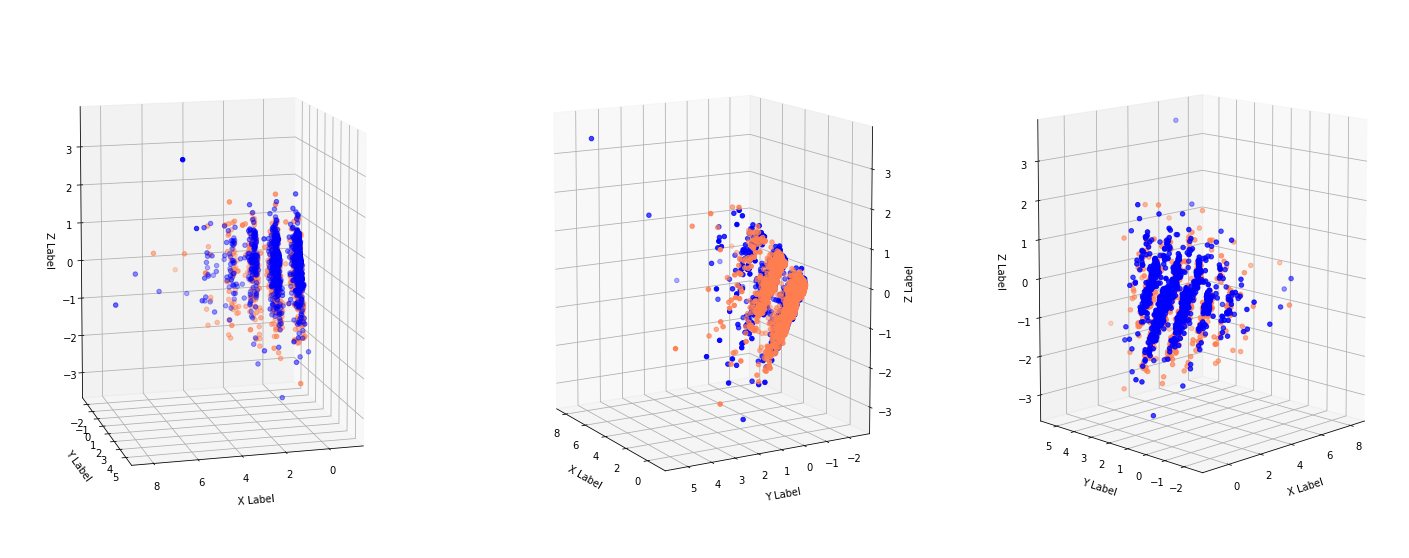

In [288]:
col = ['coral', 'blue']
categories = [0,1]

fig = plt.figure(figsize=(25,10))

# plot
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    for c, category in zip(col, categories):
        xs = X_reduced[X['Score'] == category].T[0]
        ys = X_reduced[X['Score'] == category].T[1]
        zs = X_reduced[X['Score'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o')
        
    ax.view_init(elev=10., azim=75*(i+1))   
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    
    
plt.show

### atrribute transformation / aggregation

In [289]:
term_frequencies = []
term_frequencies = X_counts.toarray().sum(axis=0)

In [290]:
X_counts.shape

(2983, 5155)

In [291]:
term_frequencies.shape

(5155,)

In [292]:
# use plotly to have a nicer interactive visualization
import plotly.graph_objects as go

plot_data = []

for i in range(300):
    plot_data.append("term_" + str(count_vect.get_feature_names()[i]))

fig = go.Figure([go.Bar(x=plot_data, y=term_frequencies[:300])])
fig.update_traces(marker_color='rgb(17,157,255)', marker_line_color='rgb(17,157,255)',
                  marker_line_width=2, opacity=0.6)

fig.show()

In [293]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

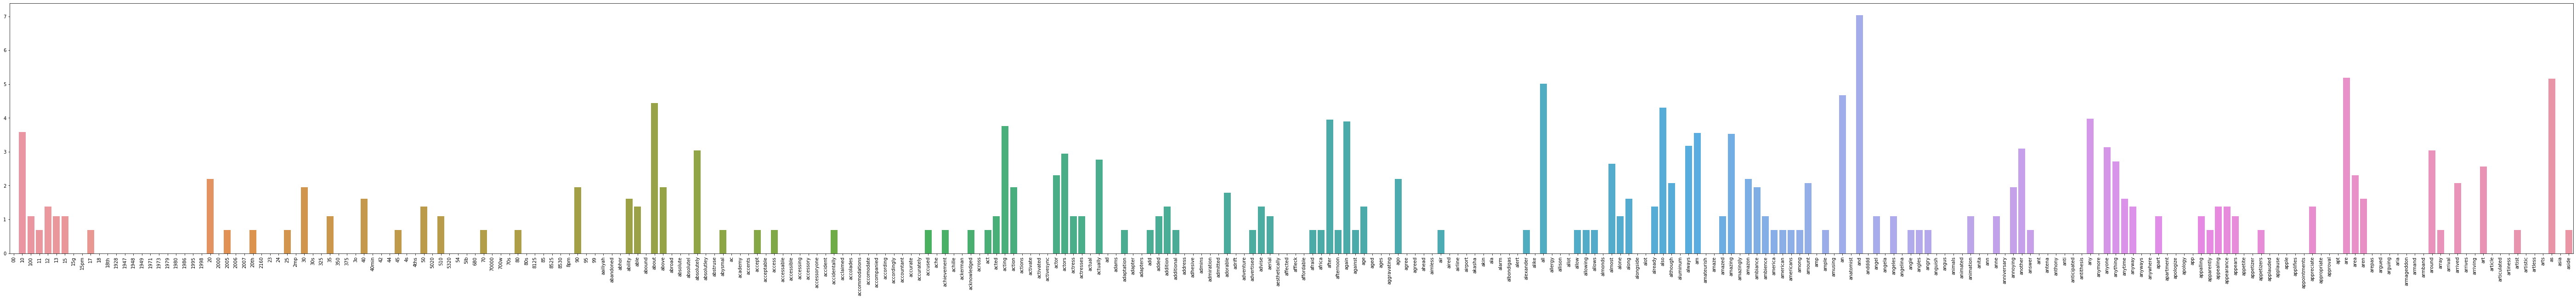

In [294]:
# transform the values in that vector into the log distribution
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### discretization and binarization

In [295]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [296]:
mlb = preprocessing.LabelBinarizer()

In [297]:
mlb.fit(X.Score)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [298]:
X['bin_category'] = mlb.transform(X['Score']).tolist()

In [299]:
X[0:10]

,Sentence,Score,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]
9,What a waste of money and time!.,0,"[What, a, waste, of, money, and, time, !, .]",[0]


## 6. Data Exploration

In [300]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['Sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['Sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['Sentence']
document_to_transform_3.append(random_record_3)

In [301]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [302]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [303]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Third part

## 1. New Data Visualizations

In [304]:
X[0:10]

,Sentence,Score,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]
9,What a waste of money and time!.,0,"[What, a, waste, of, money, and, time, !, .]",[0]


In [305]:
X_counts.shape

(2983, 5155)

In [341]:
from textblob import TextBlob 

In [360]:
# using TextBlob to calculate polarity directly
def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity


In [361]:
X['polarity'] = X['Sentence'].apply(sentiment)
X[0:10]

,Sentence,Score,unigrams,bin_category,polarity
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0],0.000000
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1],0.850000
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1],0.800000
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0],0.390625
4,The mic is great.,1,"[The, mic, is, great, .]",[1],0.800000
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0],0.226190
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0],0.100000
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1],0.000000
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0],-0.350000
9,What a waste of money and time!.,0,"[What, a, waste, of, money, and, time, !, .]",[0],-0.250000


In [355]:
X.polarity.value_counts()

 0.000000    644
 1.000000    146
 0.500000    133
-1.000000     78
 0.800000     73
            ... 
-0.304762      1
-0.252778      1
-0.158333      1
 0.012500      1
 0.175000      1
Name: polarity, Length: 666, dtype: int64

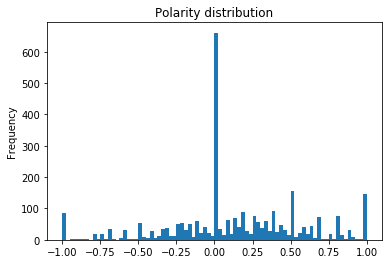

In [359]:
# plot chart for polarity
X['polarity'].plot(kind = 'hist', title = 'Polarity distribution', bins = 80)

0       0.000000
1       0.850000
2       0.800000
3       0.390625
4       0.800000
          ...   
2995    0.000000
2996    0.000000
2997   -0.166667
2998    0.100000
2999   -0.100000
Name: polarity, Length: 2983, dtype: float64

## 2. TF-IDF features

In [325]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [329]:
# calculate the number of occurrences of each word
# get the keywords for all the text in the bag with get_feature_names()
vectorizer = TfidfVectorizer()
vec = vectorizer.fit_transform(X.Sentence)
vectorizer.get_feature_names()

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2000',
 '2005',
 '2006',
 '2007',
 '20th',
 '2160',
 '23',
 '24',
 '25',
 '2mp',
 '30',
 '30s',
 '325',
 '35',
 '350',
 '375',
 '3o',
 '40',
 '40min',
 '42',
 '44',
 '45',
 '4s',
 '4ths',
 '50',
 '5020',
 '510',
 '5320',
 '54',
 '5lb',
 '680',
 '70',
 '70000',
 '700w',
 '70s',
 '80',
 '80s',
 '8125',
 '85',
 '8525',
 '8530',
 '8pm',
 '90',
 '95',
 '99',
 'aailiyah',
 'abandoned',
 'abhor',
 'ability',
 'able',
 'abound',
 'about',
 'above',
 'abroad',
 'absolute',
 'absolutel',
 'absolutely',
 'absolutley',
 'abstruse',
 'abysmal',
 'ac',
 'academy',
 'accents',
 'accept',
 'acceptable',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessory',
 'accessoryone',
 'accident',
 'accidentally',
 'acclaimed',
 'accolades',
 'accommodations',
 'accomodate',
 'accompanied',
 'according',

In [330]:
# the result of the word frequency matrix can be seen
vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [337]:
transformer = TfidfTransformer()
transformer

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [338]:
# count the TF-IDF value of each word in the vectorizer
tfidf = transformer.fit_transform(X_counts)
tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 3. Naive Bayes classifier

In [368]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [369]:
# 70% training set and 30% testing set

wf_train_x, wf_test_x, wf_train_y, wf_test_y = train_test_split(X_counts, X['Score'], test_size=0.3, random_state=0)

In [370]:
tfidf_train_x, tfidf_test_x, tfidf_train_y, tfidf_test_y = train_test_split(tfidf, X['Score'], test_size=0.3, random_state=0)

In [371]:
# build two seperate classifiers
model = MultinomialNB()
wf_fit = model.fit(wf_train_x, wf_train_y)
tfidf_fit = model.fit(tfidf_train_x, tfidf_train_y)

In [386]:
# the accuracy in training data using word frequency
wf_fit.score(wf_train_x, wf_train_y)

0.9396551724137931

In [387]:
# the accuracy in training data using tf-idf
tfidf_fit.score(tfidf_train_x, tfidf_train_y)

0.9501915708812261

In [388]:
# the accuracy in testing data using word frequency
wf_fit.score(wf_test_x, wf_test_y)

0.8245810055865922

In [389]:
# the accuracy in testing data using tf-idf
tfidf_fit.score(tfidf_test_x, tfidf_test_y)

0.823463687150838

### Comment on the differences

In this data set, the classifier with **word frequency** training is a little **better** than TD-IDF.<br>
In this case, the positive sentences have some common used words like good or best.<br>
I think that makes the sentiment can be identified obviously.

## Fourth part

**Inefficent parts I noticed**
<br>
<br>
In this homework, I think **sampling** is redundant behavior because we finally use all data for training and testing set.
<br>
And I also not use the result of **discretization and binarization**, the reason may be we only have an attribute of two categorical values. It makes this very important pre-preprocessing technique useless in this case.
<br>
<br>
**How to improve the Data preprocessing for these specific datasets**?
<br>
<br>
1. Check missing values and duplicate data
<br>
2. Unigrams
<br>
3. Calculate term frequencies and tf-idf
<br>
4. Visualization
<br>
5. Observe data characteristics and what to do
<br>
6. Select the proportion of testing set(usually 20-30%)
<br>
7. Use two different features in classifier
<br>
8. Accuracy and visualization